# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [26]:
# Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split as TTS

# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [11]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv("./data/fashion-small.csv")

### Inspect for null values

In [12]:
# 2. Inspect / remove null values. 
df.dropna()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Sneaker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,Sandal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,Shirt,0,0,0,0,0,0,0,1,0,...,126,102,0,0,0,0,0,0,0,0
5998,T-shirt/top,0,0,1,0,0,0,0,0,0,...,89,91,96,0,0,2,0,0,0,0


### Check for duplicates

In [13]:
# 3. Inspect / remove duplicate rows. 
df.drop_duplicates()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Sneaker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,Sandal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,Shirt,0,0,0,0,0,0,0,1,0,...,126,102,0,0,0,0,0,0,0,0
5998,T-shirt/top,0,0,1,0,0,0,0,0,0,...,89,91,96,0,0,2,0,0,0,0


### Lets look at our class balances

In [14]:
# 4. Print out the number examples in each class aka the class balances. 
df.label.value_counts(), df.label.value_counts(normalize=True)

(Sandal         646
 Trouser        612
 Ankle boot     605
 Shirt          601
 Pullover       598
 Coat           597
 T-shirt/top    590
 Dress          585
 Bag            584
 Sneaker        582
 Name: label, dtype: int64,
 Sandal         0.107667
 Trouser        0.102000
 Ankle boot     0.100833
 Shirt          0.100167
 Pullover       0.099667
 Coat           0.099500
 T-shirt/top    0.098333
 Dress          0.097500
 Bag            0.097333
 Sneaker        0.097000
 Name: label, dtype: float64)

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [16]:
# Grabs all of the columns 
pixel_columns = df.columns

# Convert the all columns object into a regular list
pixel_columns = list(pixel_columns)

# Sanity check that it is now just a list.
print(type(pixel_columns))

# Remove just the label column from the list
pixel_columns.remove("label")

pixel_columns


<class 'list'>


['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

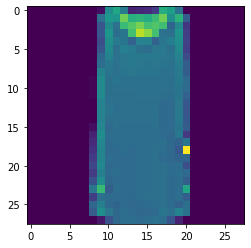

In [21]:
# Select just the pixel columns and convert them to a numpy array by using .values. 
imgs = df[pixel_columns].values

# Select just one image from all the images
img = imgs[0]

# Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(28,28)

# Plot reshaped image
plt.imshow(img)

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [22]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns


# Convert the all columns object into a regular list
selected_features = list(selected_features)


# Sanity check that it is now just a list.
print(type(selected_features))

# Remove the label column from the list
# This happnes 'in place'
selected_features.remove("label")

selected_features


<class 'list'>


['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

### 2. Define our `X` and `y`

In [23]:
# 2. Define our `X` and `y` data. 

X = df[selected_features]

y = df['label']

### 3. Train-test-split our `X` and `y` data

In [27]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = TTS(
    X, y, test_size=0.2)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [ ]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier

In [ ]:
# 2. Fit that model with our training data. 


___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [ ]:
### 1. Get and print a baseline accuracy score.
accuracy = ???
print("Accuracy %f" % accuracy)

### 2. Make new predictions using our test data. 

In [ ]:
### 2. Make new predictions using our test data. 


### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [ ]:
### 3. Print the classification report. 



### 4. Plot the confusion matrix of our predicted results. 

In [8]:
### 4. Plot the confusion matrix of our predicted results.


### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [4]:
print('The classifier mistaked YOUR_ANSWER_HERE and YOUR_ANSWER_HERE the most.')

The classifier mistaked YOUR_ANSWER_HERE and YOUR_ANSWER_HERE the most.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [ ]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    ???

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

In [ ]:
# LogisticRegression


In [ ]:
# RandomForest


In [ ]:
# MultinomialNB


In [3]:
print('YOUR_ANSWER_HERE model did the best and YOUR_ANSWER_HERE model did the worst.')

 YOUR_ANSWER_HERE model did the best and YOUR_ANSWER_HERE model did the worst.


# Dope Extra Credit
### This is going to take some python trickery to get working.  The files are large, in all sorts of strange directories, and in color.  This will not only challenge your data science skills, but also your general 'hacker' skills. 

* Use this data provided Intel to build a classifier for color images in directories: 
* [https://www.kaggle.com/datasets/puneet6060/intel-image-classification](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)
* If you have any issues, just slack me.  I got slack on my phone and love hearing your battle stories 